# 0. Import Dependencies

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# 1. Import Data

In [51]:
df = pd.read_csv('emails.csv')

In [52]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [53]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# 2. Data Visualization

In [55]:
ham = df[df['spam'] == 0]

In [56]:
ham.head()

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0


In [57]:
spam = df[df['spam'] == 1]

In [58]:
spam.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [59]:
print(f"Spam Percentage: %{len(spam)/len(df)*100}")

Spam Percentage: %23.88268156424581


In [60]:
print(f"Not Spam Percentage: %{len(ham)/len(df)*100}")

Not Spam Percentage: %76.11731843575419


c:\Users\tolga\Anaconda3\envs\tf_gpu_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


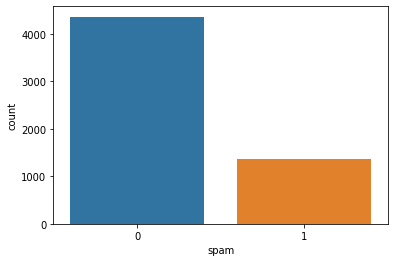

In [61]:
sns.countplot(df['spam'], label = "Count Spam vs. Ham")
plt.show()

# 3. Data Cleaning

In [79]:
vectorizer = CountVectorizer()

spamVectorizeData = vectorizer.fit_transform(df['text'])

In [80]:
spamVectorizeData.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [69]:
label = df['spam'].values

# 4. Model Training

In [70]:
nb_classifier = MultinomialNB()
nb_classifier.fit(spamVectorizeData, label)

MultinomialNB()

In [72]:
testing_data = ['Free Money', 'Hi Kim, Please let me know if you need any further information.']
testing_vectorize_data = vectorizer.transform(testing_data)

In [78]:
test_pred = nb_classifier.predict(testing_vectorize_data)
test_pred

array([1, 0], dtype=int64)

In [83]:
X = spamVectorizeData
y = df['spam'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

# 5. Model Evaluate

In [87]:
y_pred = nb_classifier.predict(X_test)

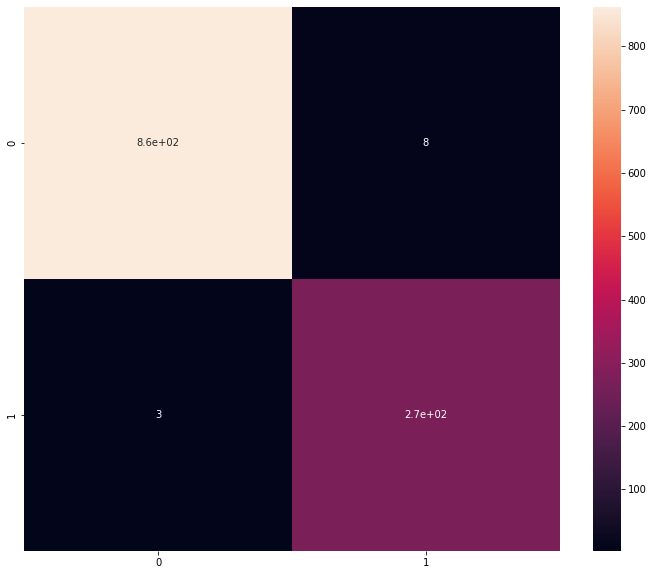

In [90]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True)
plt.show()

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      0.99      0.98       276

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

